In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [5]:
df=pd.read_csv('D:/Downloads/Week/Week 2/Titanic-Dataset.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.duplicated().sum()

np.int64(0)

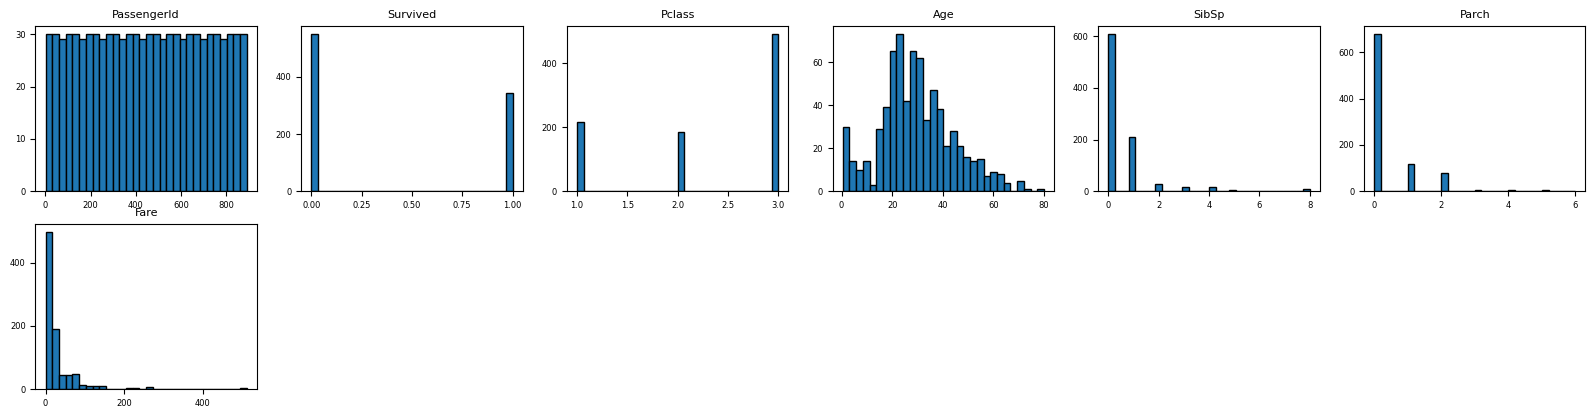

In [8]:
plt.figure(figsize=(20, 15))
numeric_cols = df.select_dtypes(include=['int64','float']).columns
for i, col in enumerate(numeric_cols):
    plt.subplot(6, 6, i + 1)  
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(col, fontsize=8)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)

plt.show()


In [9]:
df['family_size']=df['Parch']+df['SibSp']+1

In [10]:
df=df.drop('Parch',axis=1)
df=df.drop('SibSp',axis=1)

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1


In [12]:
df['Age']=pd.cut(df['Age'], bins=[0, 12, 18, 60, 100], labels=['Child', 'Teen', 'Adult', 'Aged'])

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,Adult,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,Adult,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,Adult,373450,8.0500,NaN,S,1


In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Ticket           0
Fare             0
Cabin          687
Embarked         2
family_size      0
dtype: int64

In [15]:
age_mode=df['Age'].mode()[0]
df['Age']=df['Age'].fillna(age_mode)

<Axes: >

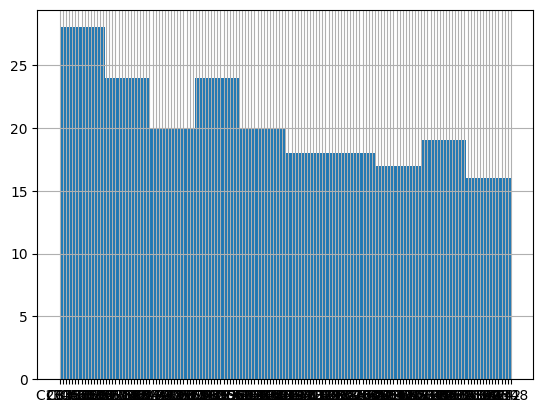

In [16]:
df['Cabin'].hist()

In [17]:

df['Cabin']=df['Cabin'].fillna('U')

In [18]:
Embarked_mode=df['Embarked'].mode()[0]
df['Embarked']=df['Embarked'].fillna(Embarked_mode)

In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Ticket         0
Fare           0
Cabin          0
Embarked       0
family_size    0
dtype: int64

C:\Users\Dell\AppData\Local\Temp\ipykernel_17780\493505012.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


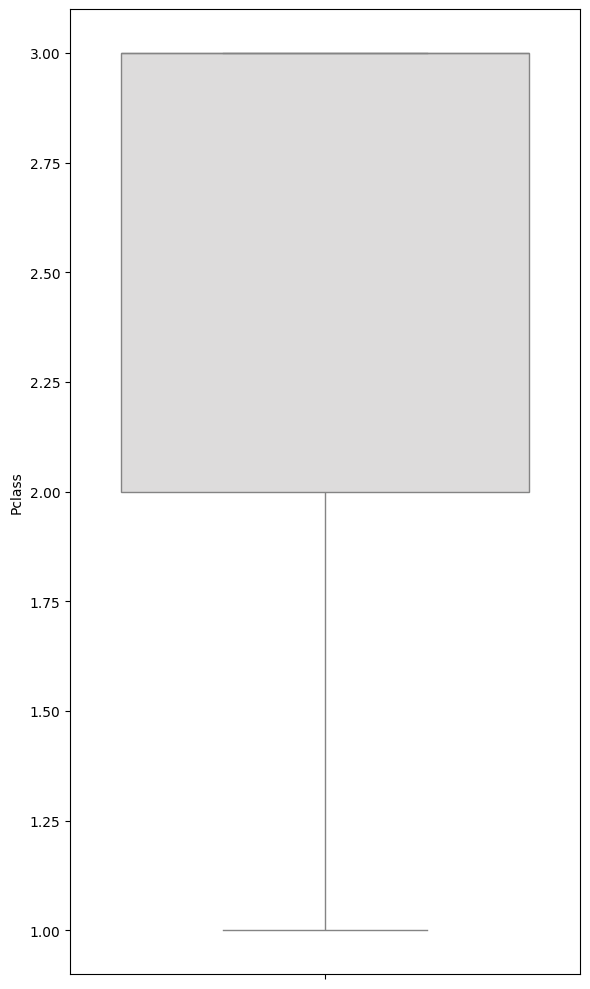

C:\Users\Dell\AppData\Local\Temp\ipykernel_17780\493505012.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


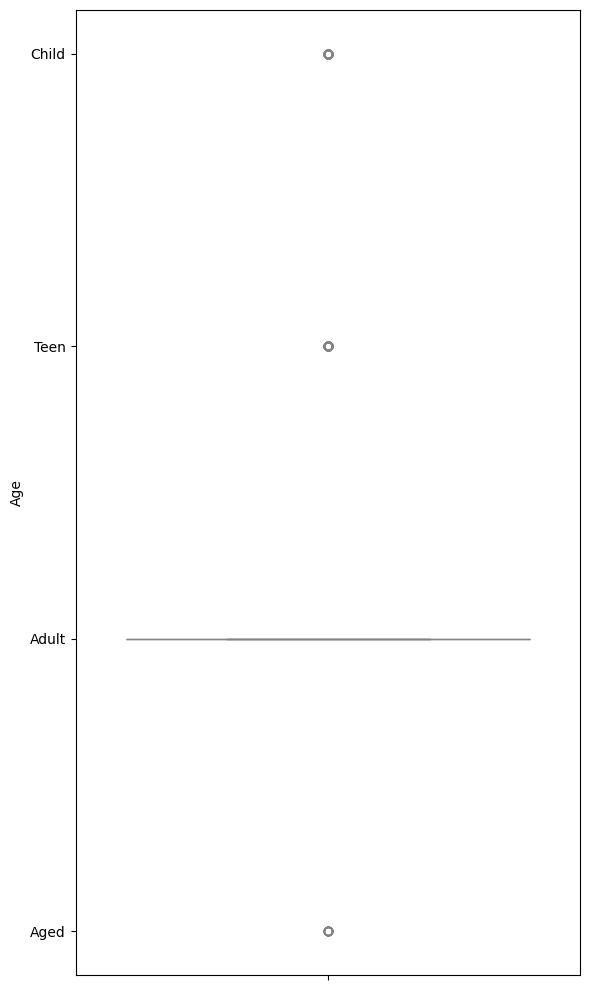

C:\Users\Dell\AppData\Local\Temp\ipykernel_17780\493505012.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


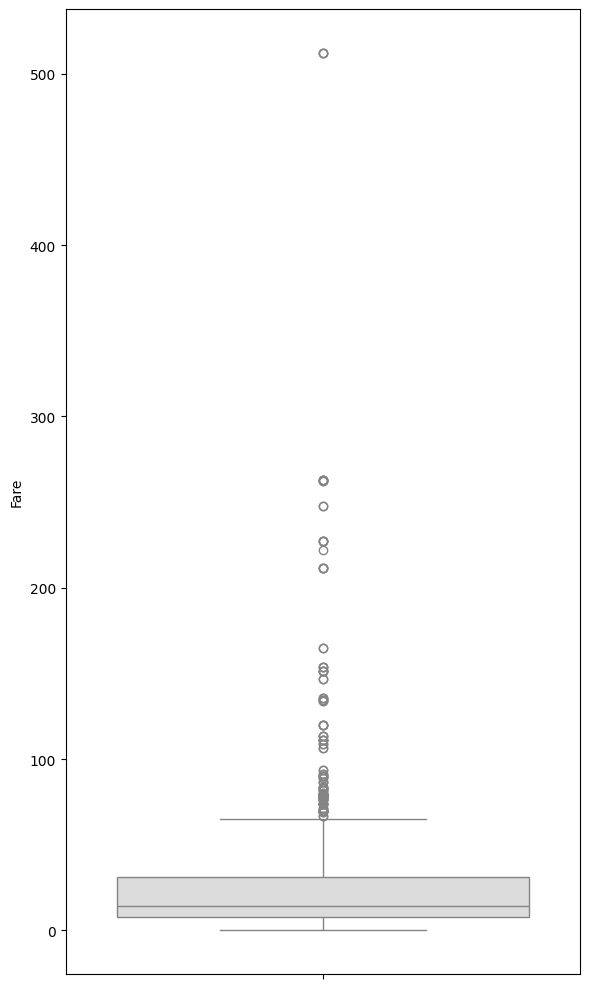

C:\Users\Dell\AppData\Local\Temp\ipykernel_17780\493505012.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


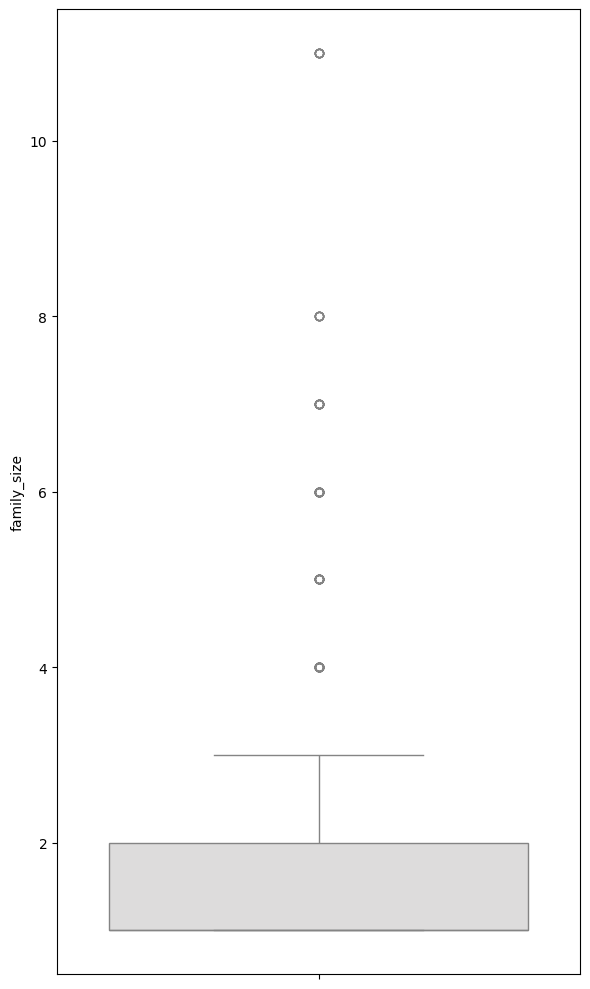

In [20]:
columns=['Pclass','Age','Fare','family_size']


for feature in columns:
    plt.figure(figsize=(6, 10))
    sns.boxplot( y=df[feature], palette=("coolwarm"))
    plt.tight_layout()
    plt.show()

In [20]:
corr_matrix=df[['Survived','Fare','Pclass','family_size']].corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
family_size    0.016639
Pclass        -0.338481
Name: Survived, dtype: float64

[]

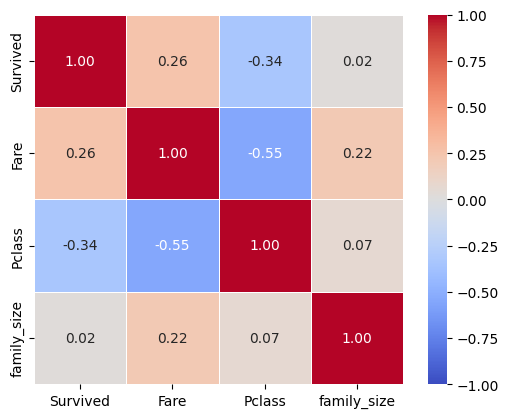

In [21]:

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5, square=True)
plt.Figure(figsize=(12,18))
plt.plot()

In [21]:
df = pd.get_dummies(df, columns=['Age'], prefix='Age', drop_first=False)

In [22]:
df = pd.get_dummies(df, columns=['Sex'], prefix='Sex', drop_first=False)

In [23]:
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked', drop_first=False)

In [24]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [25]:
df['Cabin'].unique()

array(['U', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [26]:
df['Cabin1'] = df['Cabin'].str[0] 

In [27]:
df['HasCabin'] = (df['Cabin1'] != 'U').astype(int)


In [278]:
df.head()

,PassengerId,Survived,Pclass,Name,Ticket,Fare,Cabin,family_size,Age_Child,Age_Teen,Age_Adult,Age_Aged,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin1,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",A/5 21171,7.2500,U,2,False,False,True,False,False,True,False,False,True,U,0
2,3,1,3,"Heikkinen, Miss. Laina",STON/O2. 3101282,7.9250,U,1,False,False,True,False,True,False,False,False,True,U,0
4,5,0,3,"Allen, Mr. William Henry",373450,8.0500,U,1,False,False,True,False,False,True,False,False,True,U,0
5,6,0,3,"Moran, Mr. James",330877,8.4583,U,1,False,False,True,False,False,True,False,True,False,U,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",347742,11.1333,U,3,False,False,True,False,True,False,False,False,True,U,0


In [279]:
df.head()

,PassengerId,Survived,Pclass,Name,Ticket,Fare,Cabin,family_size,Age_Child,Age_Teen,Age_Adult,Age_Aged,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin1,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",A/5 21171,7.2500,U,2,False,False,True,False,False,True,False,False,True,U,0
2,3,1,3,"Heikkinen, Miss. Laina",STON/O2. 3101282,7.9250,U,1,False,False,True,False,True,False,False,False,True,U,0
4,5,0,3,"Allen, Mr. William Henry",373450,8.0500,U,1,False,False,True,False,False,True,False,False,True,U,0
5,6,0,3,"Moran, Mr. James",330877,8.4583,U,1,False,False,True,False,False,True,False,True,False,U,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",347742,11.1333,U,3,False,False,True,False,True,False,False,False,True,U,0


In [28]:
column1=['Fare','family_size','Fare']
for col in column1:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [29]:
y=df['Survived']
X=df[['Pclass','Fare','family_size','Age_Child','Age_Teen','Age_Adult','Age_Aged','Sex_female','Sex_male'	,'Embarked_C','Embarked_Q','Embarked_S','HasCabin']]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [32]:
pipeline={
    'KNN':Pipeline([
        ('scalar',StandardScaler()),
        ('classifier',KNeighborsClassifier(n_neighbors=3))
    ]),
    'Decsion tree':Pipeline([
        ('scalar',StandardScaler()),
        ('classifier',DecisionTreeClassifier(max_depth=5,random_state=42, splitter='random',criterion='entropy'))
    
    ]),
    'Naive Byes':Pipeline([
        ('scalar',StandardScaler()),
        ('classifier',GaussianNB(var_smoothing=1e-8))
    ])
}

In [33]:
best_accuracy=0
best_model=None
best_model_name=None
for name,model in pipeline.items():
    print(name)
    model.fit(X_train,y_train)
    Train_pred=model.predict(X_train)
    Test_pred=model.predict(X_test)
    Train_accuracy=accuracy_score(Train_pred,y_train)
    Test_accuracy=accuracy_score(Test_pred,y_test)
    print('Training Accuracy:', Train_accuracy)
    print('Testing Accuracy:', Test_accuracy)
   
    if Test_accuracy > best_accuracy:
            best_accuracy = Test_accuracy
            best_model = model
            best_model_name = name

print("\nBest Model:")
print(f"Model: {best_model_name}")
print(f"Accuracy: {best_accuracy:.4f}")      

KNN
Training Accuracy: 0.8609523809523809
Testing Accuracy: 0.8106060606060606
Decsion tree
Training Accuracy: 0.8285714285714286
Testing Accuracy: 0.8257575757575758
Naive Byes
Training Accuracy: 0.8
Testing Accuracy: 0.8409090909090909

Best Model:
Model: Naive Byes
Accuracy: 0.8409


In [36]:

from sklearn.model_selection import GridSearchCV



param_grids = {
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance']
    },
    'Decsion tree': {
        'classifier__max_depth': [3, 5, 10],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__splitter': ['best', 'random']
    },
    'Naive Byes': {
        'classifier__var_smoothing': [1e-9, 1e-8, 1e-7]
    }
}

In [37]:
results=[]
for name in pipeline:
    grid = GridSearchCV(pipeline[name], param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    train_acc = accuracy_score(y_train, best_model.predict(X_train))
    test_acc = accuracy_score(y_test, best_model.predict(X_test))
    cv_acc = grid.best_score_
    
    results.append((name, train_acc, test_acc, cv_acc, grid.best_params_))

# Create a result DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Train Accuracy", "Test Accuracy", "CV Accuracy", "Best Params"])
results_df.sort_values(by="CV Accuracy", ascending=False, inplace=True)

print(results_df)

          Model  Train Accuracy  Test Accuracy  CV Accuracy  \
1  Decsion tree        0.820952       0.803030     0.820952   
0           KNN        0.830476       0.810606     0.807619   
2    Naive Byes        0.800000       0.840909     0.792381   

                                         Best Params  
1  {'classifier__criterion': 'gini', 'classifier_...  
0  {'classifier__n_neighbors': 5, 'classifier__we...  
2               {'classifier__var_smoothing': 1e-09}  


In [38]:
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['Survived','Not Survived']))

              precision    recall  f1-score   support

    Survived       0.89      0.88      0.88        88
Not Survived       0.76      0.77      0.76        44

    accuracy                           0.84       132
   macro avg       0.82      0.82      0.82       132
weighted avg       0.84      0.84      0.84       132



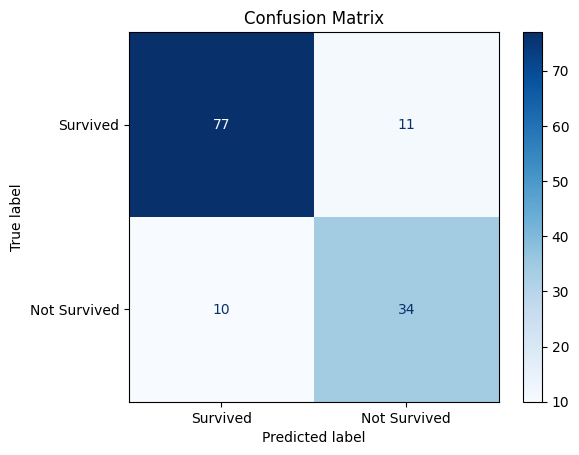

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
labels = ['Survived','Not Survived']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()